In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from bs4 import BeautifulSoup

In [2]:
from tqdm import tqdm
from tqdm import tnrange

In [3]:
default_text_size=10
font_times = {'family':'Arial'}

plt.rc('font', size=default_text_size)          # controls default text sizes
plt.rc('axes', titlesize=default_text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_text_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_text_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_text_size)    # fontsize of the tick labels
plt.rc('figure', titlesize=default_text_size)  # fontsize of the figure title
plt.rc('font', **font_times)
plt.rc('figure', figsize=(10,8))
plt.rc('figure', facecolor='w')
plt.rc('legend', fontsize=10, frameon=False)
plt.rc('lines', linewidth=2)
lw = 2 #default line width
ms = 15

In [4]:
t2021 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2021.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
t2020 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2020.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
t2019 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2019.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
# t2018 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2018.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
# t2017 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2017.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
# t2016 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2016.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
# t2015 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2015.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])
# t2014 = pd.read_csv('/Users/amalyajohnson/Desktop/Data Science/DS4A/BART_DATASET/date-hour-soo-dest-2014.csv', names=['Day', 'Hour', 'Origin', 'Destination', 'Trip Count'])

### Previously: 

In [5]:
# #webscraping to get zipcodes
# stat_names = pd.read_csv('BART_STATIONS_ABBREVIATIONS.txt', delimiter='\t')
# zips = pd.read_csv('bay_zipcodes.txt', delimiter='\t')

# zipcodes = []
# for name in stat_names['Abbr']:
#     URL = f'https://www.bart.gov/stations/{name}'
#     page = requests.get(URL)
#     soup = BeautifulSoup(page.content, 'html.parser')
#     for link in soup.find_all('a', href=True):
#         if '9' in link.text and ' ' not in (link.text)[-5:]:
#             zipcode = (link.text)[-5:]
#             try:
#                 int(zipcode)
#                 zipcodes.append(zipcode)
#             except ValueError: 
#                 pass
# stat_names['Zipcode'] = zipcodes

# up_names = []
# for s in stat_names['Abbr']:
#     up_names.append(s.upper())
# stat_names['Abbr'] = up_names

# stat_names.set_index('Abbr', inplace=True)

# #checking for missing values
# for df in [t2021, t2020, t2019, t2018, t2017, t2016, t2015, t2014]:
#     add_year(df)
    
# df_list = [t2021, t2020, t2019, t2018, t2017, t2016, t2015, t2014]

# for df in df_list: 
#     print(df.isnull().values.any())
# #No NaN values, interpolation not necessary 

# #making the full dataframe
# full_df = pd.concat([t2021, t2020, t2019, t2018, t2017, t2016, t2015, t2014])

# # full_df['Origin_Zipcode'] = np.zeros(len(full_df))
# # full_df['Destination_Zipcode'] = np.zeros(len(full_df))

# og_zip = []
# for i, station in enumerate(full_df.Origin): 
# #     full_df.iloc[i]['Origin_Zipcode'] = stat_names.loc[station]['Zipcode']
#     og_zip.append(stat_names.loc[station]['Zipcode'])
# full_df['Origin_Zipcode'] = og_zip

# dest_zip = []
# for i, station in enumerate(full_df.Destination):
# #     full_df.iloc[i]['Destination_Zipcode'] = stat_names.loc[station]['Zipcode']
#     dest_zip.append(stat_names.loc[station]['Zipcode'])
# full_df['Destination_Zipcode'] = dest_zip


In [6]:
#in a year, which routes have the highest travel? 

# top_trips19 = t2019.groupby(['Origin', 'Destination', 'Year']).sum().sort_values(by='Trip Count', ascending=False)
# top_pairs = []
# for i in top_trips19[:9].index:
#     top_pairs.append((i[0], i[1]))
# tot_idx = []
# for i in top_pairs:
#     for j in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]:
#         tot_idx.append((i[0], i[1], j))

### Functions for Analysis

In [32]:
# stat_names = pd.read_csv('BART_STATIONS_ABBREVIATIONS_ZIPCODES.txt', index_col='Abbr')
# zip_dict = {i:stat_names['Zipcode'][i] for i in stat_names.index}
# full_df = pd.read_csv('BART_cleaned_updated_dataset.csv', index_col='Day')
# colors = plt.cm.seismic(np.linspace(0.2,0.4,2))

def add_year(df):
    if 'Year' not in df.columns:
        df['Day'] = pd.to_datetime(df['Day'])
        df.set_index('Day', inplace=True)
        year = (df.index).year
        df['Year'] = year
    

def add_zip(df):
    global zip_dict
    if 'Origin_Zipcode' not in df.columns: 
        og_zip = []
        for station in tqdm(df.Origin): 
            og_zip.append(zip_dict[station])
        df['Origin_Zipcode'] = og_zip

        dest_zip = []
        for station in tqdm(df.Destination):
            dest_zip.append(zip_dict[station])
        df['Destination_Zipcode'] = dest_zip
    
def perc_change(df1, df2, groupby:bool, origin:bool=True):
    """
    df1: dataframe of base year (older)
    df2: dataframe of new year
    groupby: grouping by stations (True) or zipcodes (False)
    origin: True/False, true: looking at origin stations, false: looking at destination stations
    """
    global zip_dict
    add_year(df1)
    add_year(df2)
    add_zip(df1)
    add_zip(df2)
    if groupby & origin: #groupby origin stations
        col = 'Origin'
    elif groupby and not origin: #groupby destination stations
        col = 'Destination'
    elif not groupby and origin: #groupby origin zipcodes
        col = 'Origin_Zipcode'
    elif not groupby and not origin: #groupby destination zipcodes
        col = 'Destination_Zipcode'
    
    old_sums = df1.groupby(col).sum().sort_values(by='Trip Count', ascending=False)['Trip Count']
    new_sums = df2.groupby(col).sum().sort_values(by = 'Trip Count', ascending = False)['Trip Count']
#     try: 
#         if df1 is t2014 and groupby: 
#             del old_sums['OAKL']
#             del old_sums[zip_dict['OAKL']]
#     except NameError:
#         pass 
    
#     try: 
    if df2 is t2020 or t2021 and not groupby: 
        del new_sums[zip_dict['BERY']]
        del new_sums[zip_dict['MLPT']]
    elif df2 in [t2020, t2021] and groupby: 
        del new_sums['BERY']
        del new_sums['MLPT']
    elif df1 is t2020 and groupby: 
        del old_sums['BERY']
        del old_sums['MLPT']
    elif df1 is t2021 and not groupby: 
        del old_sums[zip_dict['BERY']]
        del old_sums[zip_dict['MLPT']]
#     except NameError:
#         pass 
    
    new_sums = new_sums.reindex(old_sums.index)
    
    diff_df = pd.DataFrame([])
    diff_df[col] = old_sums.index
    name = '%change ' + str(df1['Year'][0]) + 'to ' + str(df2['Year'][0])
    diff_df[name] = ((new_sums - old_sums)/old_sums).values * 100
    diff_df = diff_df.sort_values(by=name, ascending=False)
    return diff_df, old_sums, new_sums

def growing_areas(df1, df2, groupby:bool, origin:bool=True, plot=True):
    """
    Find stations / zipcodes with growth between different years
    Inputs: df1 (old) df2 (new) dataframes
            groupby: grouping by stations (True) or zipcodes (False)
            origin: True/False, true: looking at origin stations, false: looking at destination stations
            plot: default True, produce histogram
    Outputs: Dataframe of stations / zipcodes with growth 
    """
    diff_df, old_sums, new_sums = perc_change(df1, df2, groupby, origin)
    yr1 = str(df1['Year'][0])
    yr2 = str(df2['Year'][0])
    name = '%change ' + yr1 + 'to ' + yr2
    
    growth = diff_df[diff_df[name] >= 0]
    growth[yr1] = [old_sums[i] for i in growth[growth.columns[0]]]
    growth[yr2] = [new_sums[i] for i in growth[growth.columns[0]]]
    
    if plot: 
        x = (np.arange(0, len(growth.index)*2.5, 2.5))
        width = 0.5
        plt.figure(figsize=(7.5,7.5))
        plt.bar(x - width/2, growth[yr1].values, width, label=yr1, color=colors[0])
        plt.bar(x + width/2, growth[yr2].values, width, label=yr2, color=colors[1])
        plt.xticks(x, list(growth[growth.columns[0]]), size=15);
        plt.yticks(size=15);
        plt.legend(fontsize=20)
        plt.xlabel(diff_df.columns[0], fontsize=15)
        plt.ylabel('Trip Counts', fontsize=20)
    return growth

def yearly_plot(df1, df2, groupby:bool, origin:bool=True):
    global full_df
    growth = growing_areas(df1, df2, groupby, origin, plot=False)
    plot_df = full_df.drop(columns = ['Year', 'Hour'])
    
    if groupby & origin: #groupby origin stations
        col = 'Origin'
    elif groupby and not origin: #groupby destination stations
        col = 'Destination'
    elif not groupby and origin: #groupby origin zipcodes
        col = 'Origin_Zipcode'
    elif not groupby and not origin: #groupby destination zipcodes
        col = 'Destination_Zipcode'
        
    plot_df = plot_df[plot_df[col]].isin(growth[col])
    plot_df = plot_df.groupby([col, 'Day']).sum()
    plot_df = plot_df.unstack(level=0)
    plot_df.plot()
    plt.xticks(size=15);
    plt.yticks(size=15);
    plt.legend(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Trip Counts', fontsize=20)
    
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))    

def yearly_plot(df1, df2, groupby:bool, origin:bool=True):
    global full_df
    growth = growing_areas(df1, df2, groupby, origin, plot=False)
    plot_df = full_df.drop(columns = ['Year', 'Hour'])
    
    if groupby & origin: #groupby origin stations
        col = 'Origin'
    elif groupby and not origin: #groupby destination stations
        col = 'Destination'
    elif not groupby and origin: #groupby origin zipcodes
        col = 'Origin_Zipcode'
    elif not groupby and not origin: #groupby destination zipcodes
        col = 'Destination_Zipcode'
    plot_df = full_df.drop(columns = ['Year', 'Hour'])
    plot_df = plot_df[plot_df[col].isin(growth[col])]
    plot_df = plot_df.groupby([col, 'Day']).sum()
    plot_df = plot_df['Trip Count'].unstack(level=0)
    plot_df = plot_df.apply(func=NormalizeData)
    plot_df.plot(colormap='seismic', subplots=True, sharex=True, legend=True, sharey=True)
    plt.xticks(size=15);
    plt.yticks(size=15);
    plt.legend(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Trip Counts', fontsize=15)
    return plot_df

In [20]:
zip_dict['BERY']

95133

### Analysis

In [ ]:
t2021

<ipython-input-7-e187859be8bc>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth[yr1] = [old_sums[i] for i in growth[growth.columns[0]]]
<ipython-input-7-e187859be8bc>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth[yr2] = [new_sums[i] for i in growth[growth.columns[0]]]


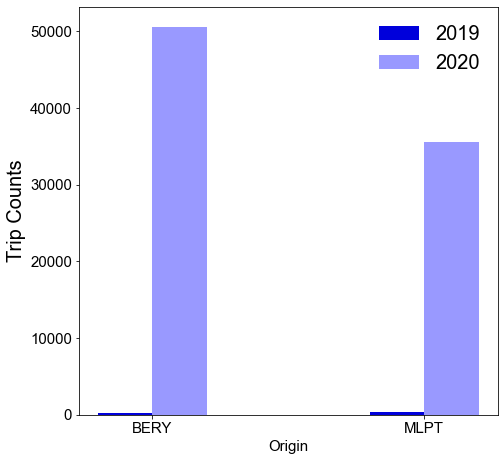

In [9]:
colors = plt.cm.seismic(np.linspace(0.2,0.4,2))
growth_df = growing_areas(t2019, t2020, True, True)

In [ ]:
add_year(t2019)
add_year(t2020)
add_zip(t2020)
add_zip(t2020)
add_year(t2021)
add_zip(t2021)


In [31]:
t2020['Origin'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF',
       'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN',
       'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE',
       'MCAR', 'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PCTR',
       'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN',
       'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK',
       'BERY', 'MLPT'], dtype=object)

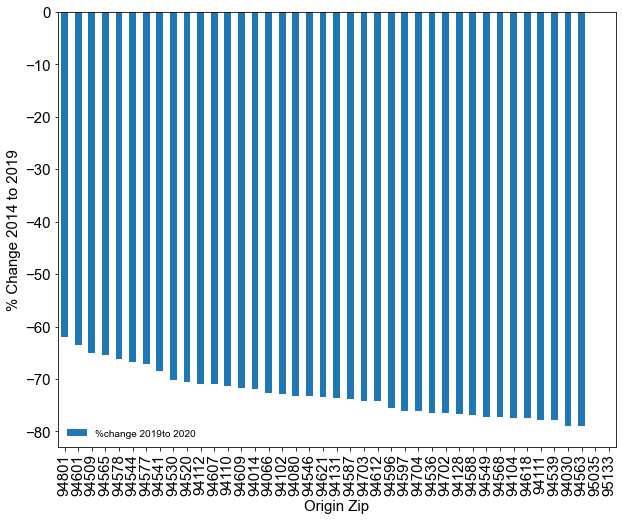

In [37]:
diff_df, old_sums, new_sums = perc_change(t2019, t2020, False, True)
diff_df.plot.bar('Origin_Zipcode')
plt.xlabel('Origin Zip', fontsize=15)
plt.ylabel('% Change 2014 to 2019',fontsize=15)
plt.xticks(size=15);
plt.yticks(size=15);
# plt.ylim(-10,10)

# diff_df[diff_df[diff_df.columns[1]] >= 0 ].plot.bar('Origin_Zipcode')
# plt.xlabel('Origin Zip', fontsize=15)
# plt.ylabel('% Change 2014 to 2019',fontsize=15)
# plt.xticks(size=15);
# plt.yticks(size=15);

In [43]:
avg_drop = diff_df['%change 2019to 2020'].mean()
std_drop = diff_df['%change 2019to 2020'].std()

In [51]:
avg_drop + std_drop

-68.308119708888

In [66]:
below_av_zips = diff_df[diff_df['%change 2019to 2020'] > avg_drop + std_drop]
94444  in (below_av_zips['Origin_Zipcode'])

False

In [67]:
plot_df = full_df.drop(columns = ['Year', 'Hour'])

In [77]:
tst = plot_df[plot_df[col].isin(below_av_zips[col])].groupby([col, 'Day']).sum()

In [79]:
plot_df = tst.unstack(level=0).apply(func=NormalizeData)['Trip Count']

/Applications/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>], dtype=object)

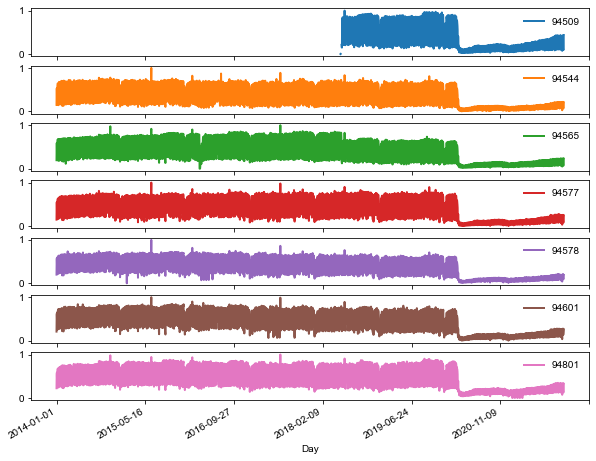

In [83]:
plot_df.plot(subplots=True)

In [57]:
# growth = growing_areas(t2019, t2019, True, True, plot=False)
plot_df = full_df.drop(columns = ['Year', 'Hour'])

col = 'Origin_Zipcode'
plot_df = plot_df[plot_df.columns.intersection([col])]
plot_df = plot_df[plot_df[col].isin(below_av_zips[col])]
plot_df = plot_df.groupby([col, 'Day']).sum()
plot_df = plot_df.unstack(level=0)
plot_df = plot_df.apply(func=NormalizeData)

In [ ]:
plot_df = full_df.drop(columns = ['Year', 'Hour'])
col = 'Origin'
plot_df = plot_df[plot_df.columns.intersection([col])]
plot_df = plot_df.groupby([col, 'Day']).sum()
plot_df = plot_df.unstack(level=0)
plot_df = plot_df.apply(func=NormalizeData)

In [60]:
full_df

,Hour,Origin,Destination,Trip Count,Year,Origin_Zipcode,Destination_Zipcode
Day,,,,,,,
2021-01-01,6,CIVC,POWL,2,2021,94102,94102
2021-01-01,6,EMBR,EMBR,2,2021,94111,94111
2021-01-01,6,LAKE,POWL,1,2021,94607,94102
2021-01-01,7,12TH,DBRK,1,2021,94612,94704
2021-01-01,7,12TH,POWL,1,2021,94612,94102
...,...,...,...,...,...,...,...
2015-01-01,2,WOAK,NCON,2,2015,94607,94520
2015-01-01,2,WOAK,PITT,2,2015,94607,94565
2015-01-01,2,WOAK,POWL,5,2015,94607,94102


In [58]:
# plot_df = full_df.drop(columns = ['Year', 'Hour'])
# plot_df = plot_df[plot_df[col].isin(growth[col])]
# plot_df = plot_df.groupby([col, 'Day']).sum()
# plot_df = plot_df['Trip Count'].unstack(level=0)
# plot_df = plot_df.apply(func=NormalizeData)
plot_df.plot(subplots=True)

TypeError: no numeric data to plot

<ipython-input-10-3cd833e7cab2>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth[yr1] = [old_sums[i] for i in growth[growth.columns[0]]]
<ipython-input-10-3cd833e7cab2>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth[yr2] = [new_sums[i] for i in growth[growth.columns[0]]]
/Applications/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


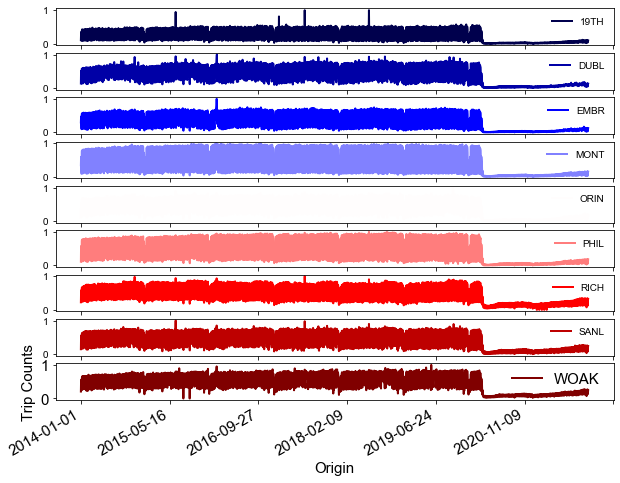

In [11]:
plot_df = yearly_plot(t2014, t2019, True, True)

/Applications/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Ridership Normalized')

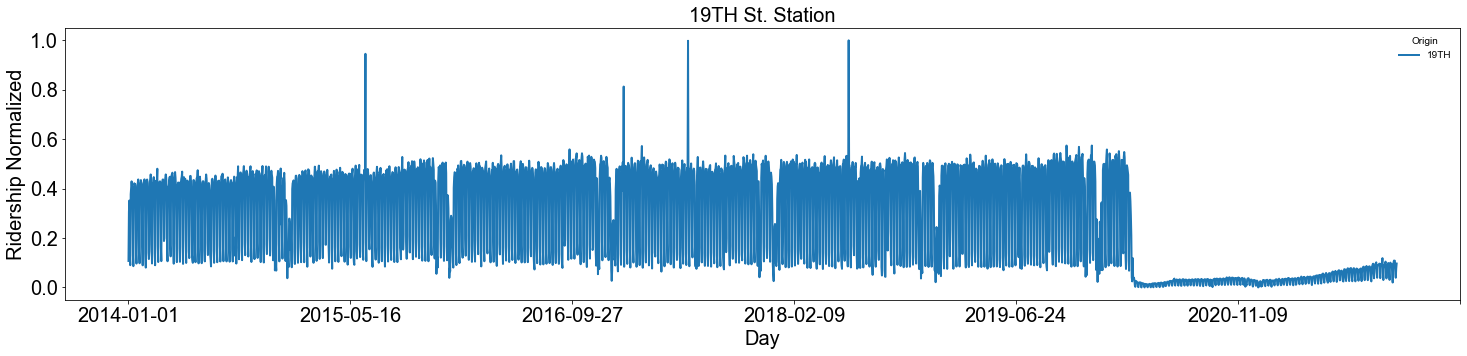

In [37]:
# plt.figure(figsize=(25,5))
# plt.plot(plot_df.index, plot_df['19TH'])
# plt.xlim(min(plot_df.index), max(plot_df.index))
plot_df.plot(y=['19TH'], figsize=(25,5))
plt.title('19TH St. Station', fontsize=20)
plt.xticks(size=20)
plt.xlabel('Day', size=20)
plt.yticks(size=20)
plt.ylabel('Ridership Normalized', size=20)

In [446]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [450]:
growth21 = t2021[t2021['Origin'].isin(growth_df['Origin'])]
del growth21['Hour']
del growth21['Year']
del growth21['Destination']

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>,
       <AxesSubplot:xlabel='Day'>], dtype=object)

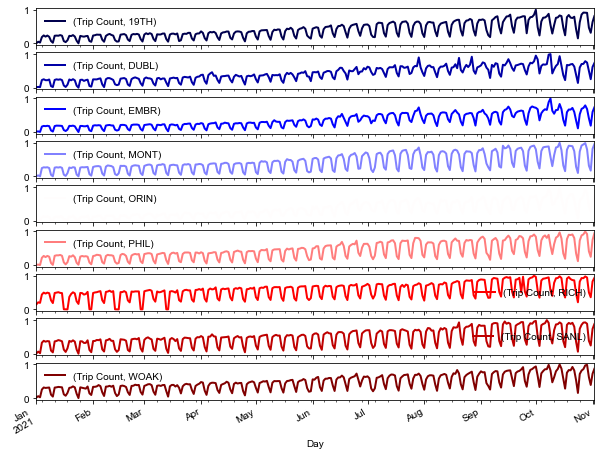

In [463]:
df = growth21.groupby(['Origin', 'Day']).sum().unstack(level=0)
df = df.apply(func=NormalizeData)
df.plot(colormap='seismic', subplots=True, sharex=True, legend=True)

Text(0, 0.5, 'Trip Counts')

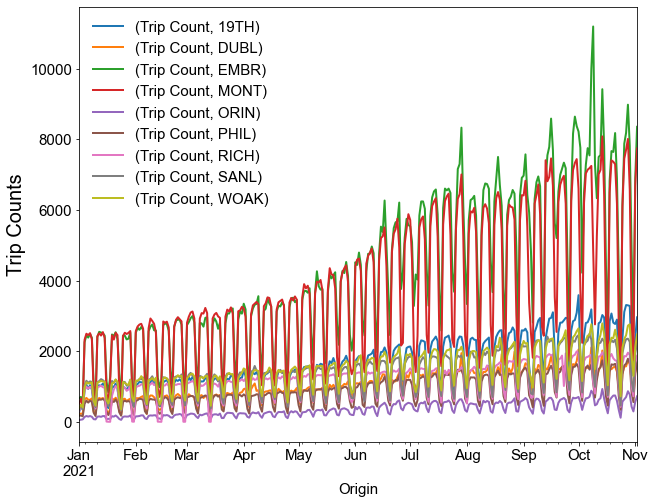

In [448]:
df = growth21.groupby(['Origin', 'Day']).sum()
df.unstack(level=0).plot()
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(fontsize=15)
plt.xlabel(diff_df.columns[0], fontsize=15)
plt.ylabel('Trip Counts', fontsize=20)

<Figure size 720x576 with 0 Axes>

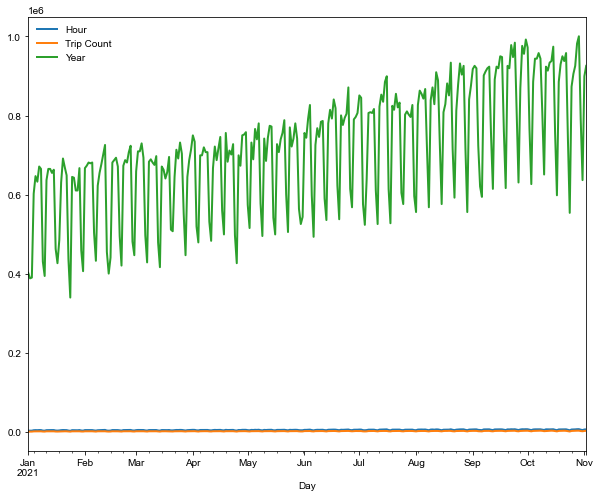

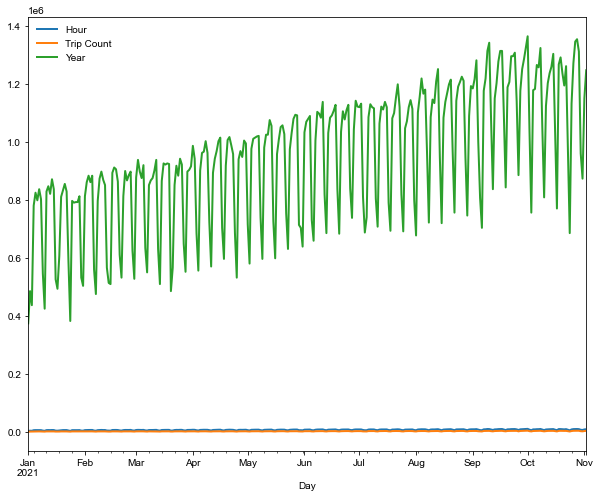

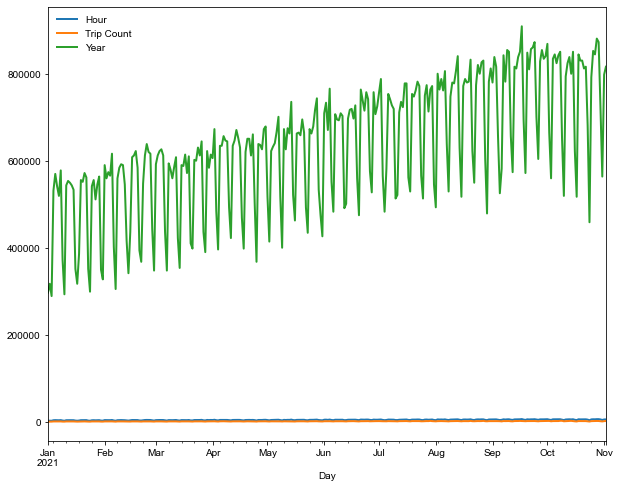

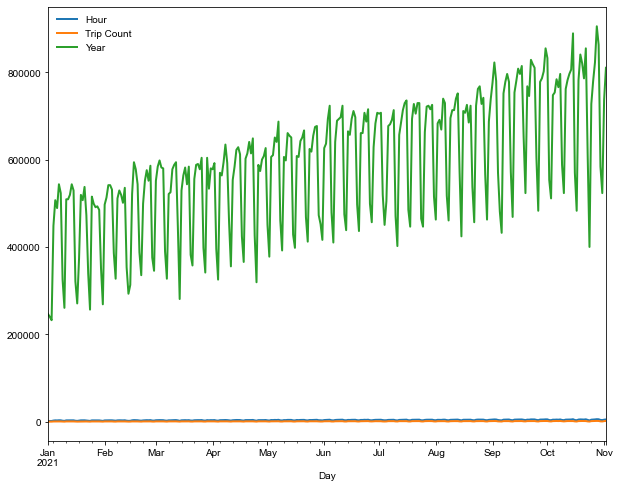

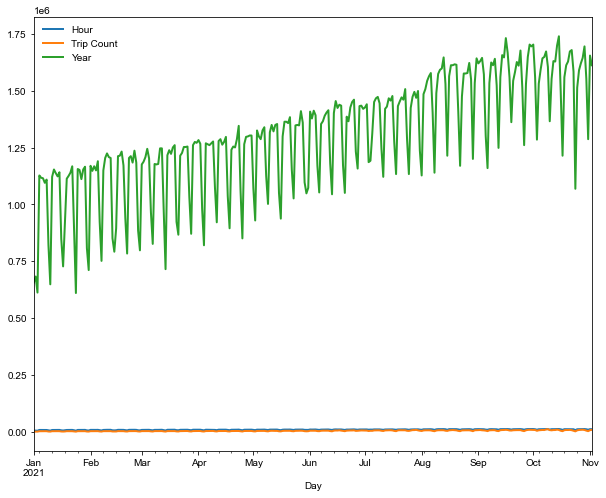

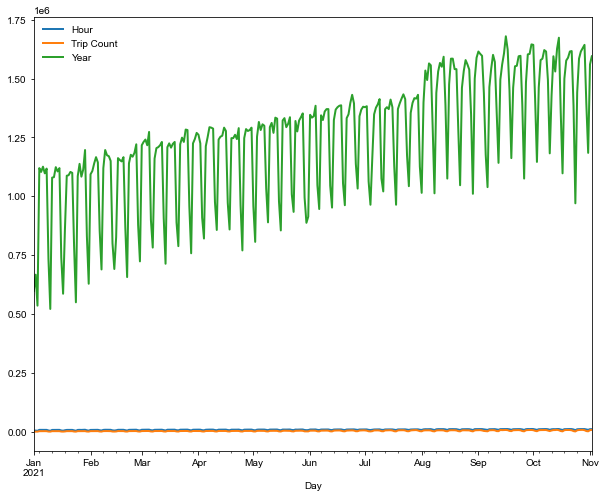

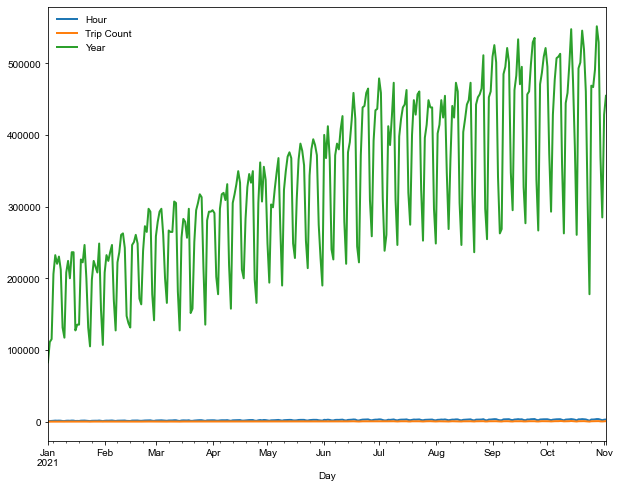

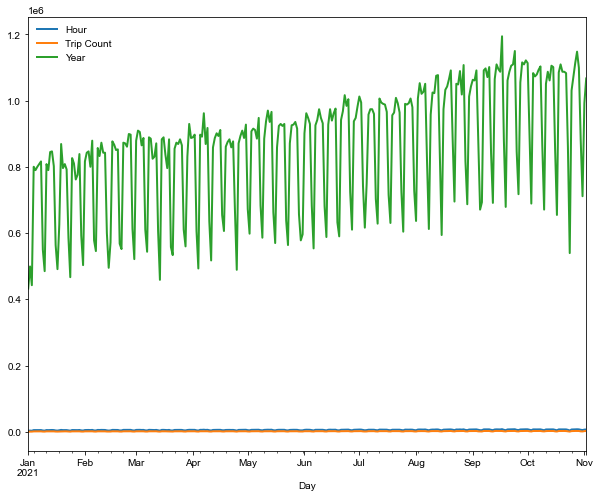

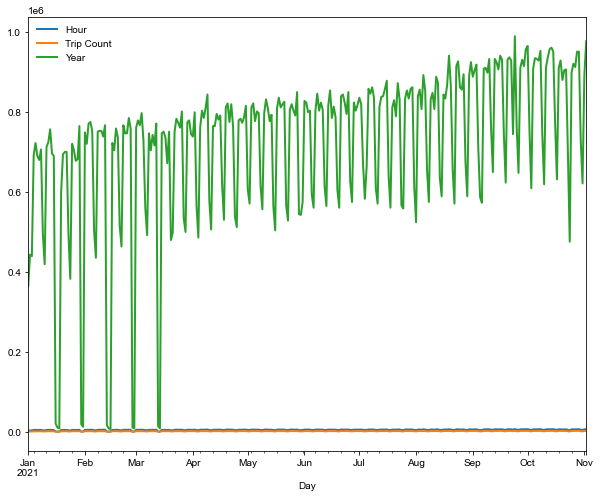

In [385]:
plt.figure()
for stat in list(growth_df['Origin']):
    df = growth21[growth21['Origin'] == stat]
    df.groupby('Day').sum().plot()

In [378]:
EMBR = growth21[growth21['Origin'] == 'EMBR']

<AxesSubplot:xlabel='Day'>

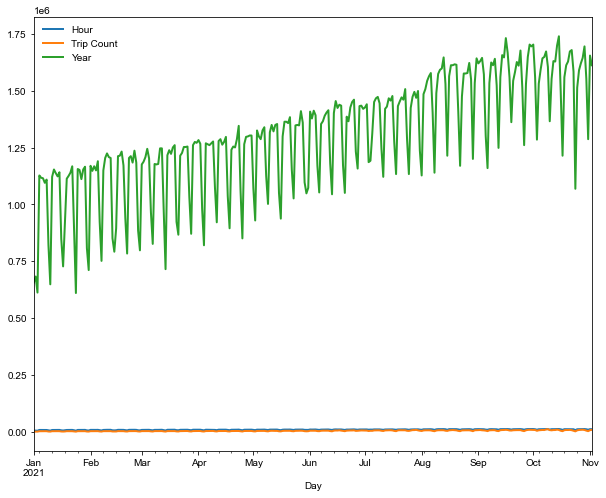

In [383]:
EMBR.groupby('Day').sum().plot()

In [266]:
t2014

,Hour,Origin,Destination,Trip Count,Year,Origin_Zipcode,Destination_Zipcode
Day,,,,,,,
2014-01-01,0,12TH,16TH,1,2014,94612,94110
2014-01-01,0,12TH,19TH,2,2014,94612,94612
2014-01-01,0,12TH,24TH,4,2014,94612,94110
2014-01-01,0,12TH,ASHB,10,2014,94612,94703
2014-01-01,0,12TH,BAYF,2,2014,94612,94578
...,...,...,...,...,...,...,...
2015-01-01,2,WOAK,NCON,2,2015,94607,94520
2015-01-01,2,WOAK,PITT,2,2015,94607,94565
2015-01-01,2,WOAK,POWL,5,2015,94607,94102


In [267]:
t2014_sums = t2014.groupby('Origin_Zipcode').sum().sort_values(by='Trip Count', ascending=False)['Trip Count']
# del t2014_sums['OAKL']
t2019_sums = t2019.groupby('Origin_Zipcode').sum().sort_values(by='Trip Count', ascending=False)['Trip Count']
t2019_sums = t2019_sums.reindex(t2014_sums.index)

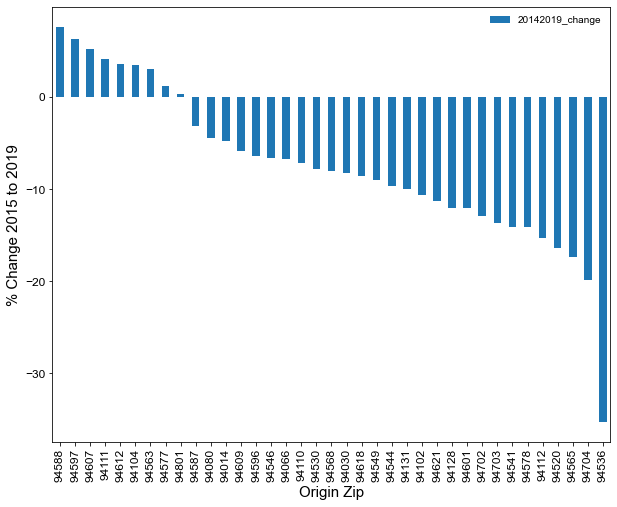

In [268]:
t2014_t2019 = pd.DataFrame([])
t2014_t2019['Origin'] = t2014_sums.index
t2014_t2019['20142019_change'] = ((t2019_sums - t2014_sums)/t2014_sums).values * 100

t2014_t2019 = t2014_t2019.sort_values(by='20142019_change', ascending=False)
t2014_t2019.plot.bar('Origin')
plt.xlabel('Origin Zip', fontsize=15)
plt.ylabel('% Change 2015 to 2019',fontsize=15)
plt.xticks(size=12);
plt.yticks(size=12);

In [269]:
incr_stats = t2014_t2019[t2014_t2019['20142019_change'] >= 0]
# incr_stats['ZIP'] = [zip_dict[stat] for stat in incr_stats['Origin']]
# incr_stats.plot.bar('ZIP')
# plt.xlabel('Origin Station' , fontsize=20)
# plt.ylabel('% Change 2015 to 2019',fontsize=20)
# plt.xticks(size=20);
# plt.yticks(size=20);

In [270]:
incr_stats['2019'] = [t2019_sums[i] for i in incr_stats['Origin']]
incr_stats['2014'] = [t2014_sums[i] for i in incr_stats['Origin']]

<ipython-input-270-40397f67f7c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incr_stats['2019'] = [t2019_sums[i] for i in incr_stats['Origin']]
<ipython-input-270-40397f67f7c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incr_stats['2014'] = [t2014_sums[i] for i in incr_stats['Origin']]


In [208]:
import matplotlib

In [261]:
colors = plt.cm.seismic(np.linspace(0.2,0.4,2))

In [264]:
incr_stats

,Origin,20142019_change,ZIP,2019,2014
19,WOAK,10.385249,94607,2389058,2164291
9,19TH,8.116792,94612,3847522,3558672
18,DUBL,7.648500,94588,2405902,2234961
22,PHIL,6.324872,94597,2107410,1982048
2,EMBR,4.108740,94111,11375886,10926927
1,MONT,3.457411,94104,11452725,11069990
42,ORIN,3.033459,94563,868638,843064
27,SANL,1.219490,94577,1775485,1754094
35,RICH,0.382258,94801,1310916,1305924


Text(0, 0.5, 'Trip Counts')

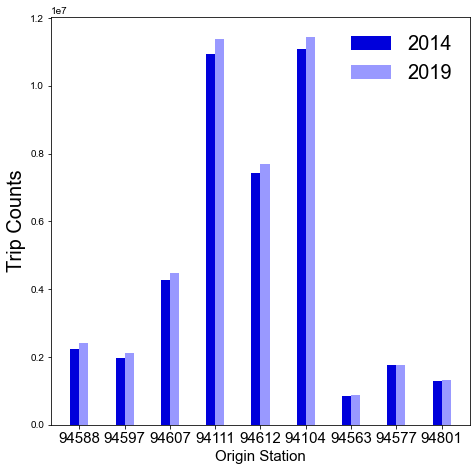

In [274]:
df = incr_stats
x = (np.arange(0, len(df.index)*2.5, 2.5))
# x = np.arange(len(t2019_sums.index))
width = 0.5
plt.figure(figsize=(7.5,7.5))
plt.bar(x - width/2, incr_stats['2014'].values, width, label='2014', color=colors[0])
plt.bar(x + width/2, incr_stats['2019'].values, width, label='2019', color=colors[1])
plt.xticks(x, list(df['Origin']), size=15);
plt.legend(fontsize=20)
plt.xlabel('Origin Station', fontsize=15)
plt.ylabel('Trip Counts', fontsize=20)

# plt.bar(t2015_sums.index, t2015_sums.values)
# plt.bar(t2019_sums.index + 10, t2019_sums.values)

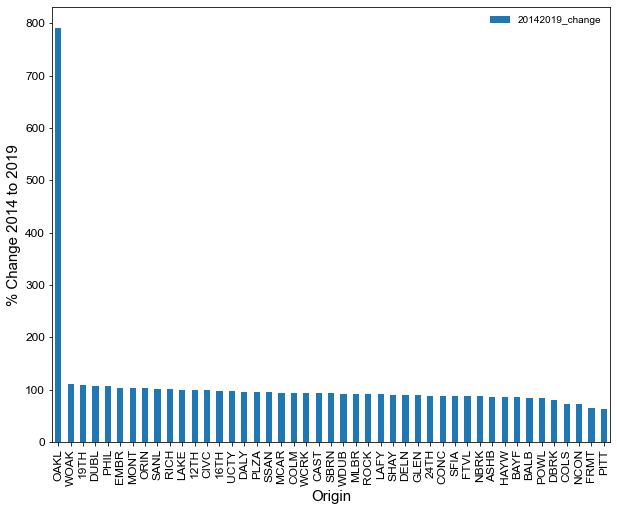

In [139]:
t2014_t2019 = t2014_t2019.sort_values(by='20142019_change', ascending=False)
t2014_t2019.plot.bar('Origin')
plt.xlabel('Origin', fontsize=15)
plt.ylabel('% Change 2014 to 2019',fontsize=15)
plt.xticks(size=12);
plt.yticks(size=12);


In [233]:
t2019_sums = t2019.groupby('Origin').sum().sort_values(by='Trip Count', ascending=False)['Trip Count']
t2019_sums = t2019_sums.reindex(t2014_sums.index)

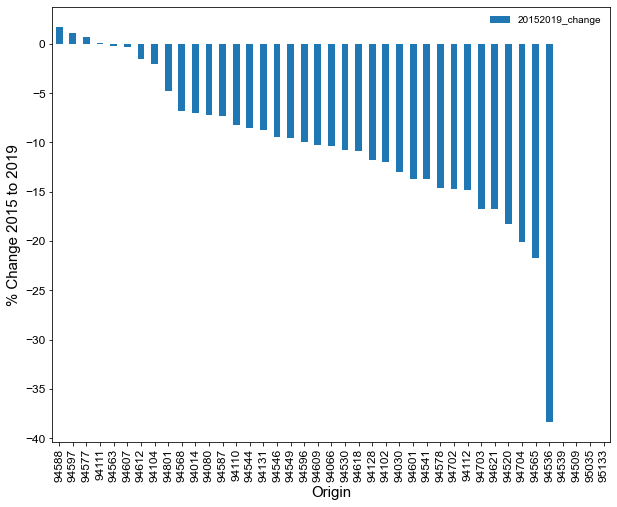

In [226]:
t2015_sums = t2015.groupby('Origin_Zipcode').sum().sort_values(by='Trip Count', ascending=False)['Trip Count']
t2015_sums = t2015_sums.reindex(t2019_sums.index)

t2015_t2019 = pd.DataFrame([])
t2015_t2019['OriginZip'] = t2015_sums.index
t2015_t2019['20152019_change'] = ((t2019_sums - t2015_sums)/t2015_sums).values * 100

t2015_t2019 = t2015_t2019.sort_values(by='20152019_change', ascending=False)
t2015_t2019.plot.bar('OriginZip')
plt.xlabel('Origin', fontsize=15)
plt.ylabel('% Change 2015 to 2019',fontsize=15)
plt.xticks(size=12);
plt.yticks(size=12);

In [202]:
t2015_sums['POWL']

11083314

In [184]:
incr_stats = t2015_t2019[t2015_t2019['20152019_change'] >= 0]
incr_stats['ZIP'] = [zip_dict[stat] for stat in incr_stats['Origin']]

<ipython-input-184-e9d74a8da62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incr_stats['ZIP'] = [zip_dict[stat] for stat in incr_stats['Origin']]


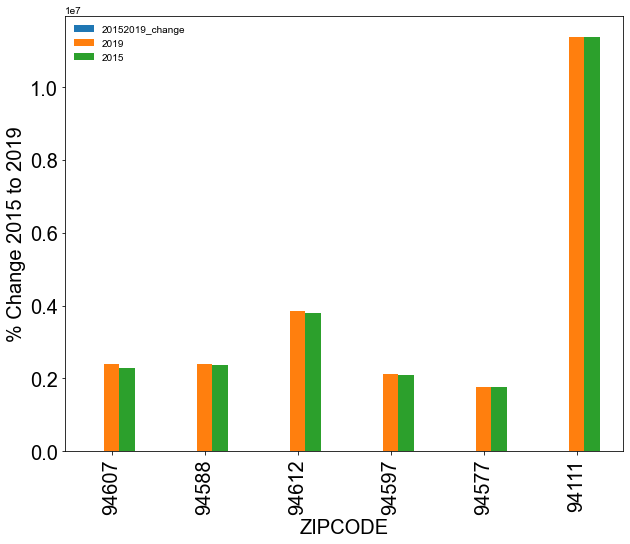

In [221]:
incr_stats.plot.bar('ZIP')
plt.xlabel('ZIPCODE', fontsize=20)
plt.ylabel('% Change 2015 to 2019',fontsize=20)
plt.xticks(size=20);
plt.yticks(size=20);

In [329]:
t2019.groupby(['Origin', 'Destination', 'Year']).sum().sort_values(by='Trip Count', ascending=False)

,,,Hour,Trip Count
Origin,Destination,Year,,
BALB,MONT,2019,94998,725547
POWL,BALB,2019,95915,714398
DUBL,EMBR,2019,91537,674486
WOAK,EMBR,2019,95732,650862
24TH,MONT,2019,95359,649089
...,...,...,...,...
BAYF,BERY,2019,13,1
DBRK,BERY,2019,7,1
MLPT,POWL,2019,8,1


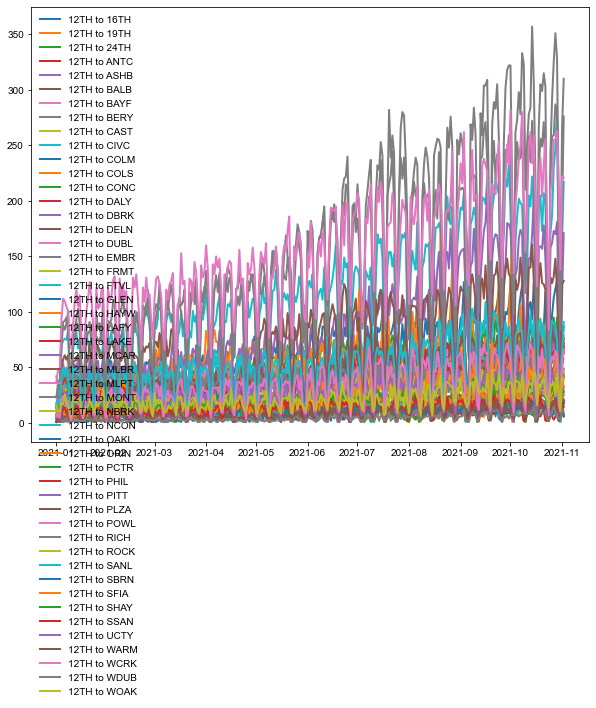

In [135]:
for pair in pairs:
    if pair[0] == '12TH':
        x = pd.to_datetime(sum_df.loc['12TH', pair[1]]['Trip Count'].index)
        plt.plot(x, sum_df.loc['12TH', pair[1]]['Trip Count'], label='12TH to '+pair[1])
plt.legend()

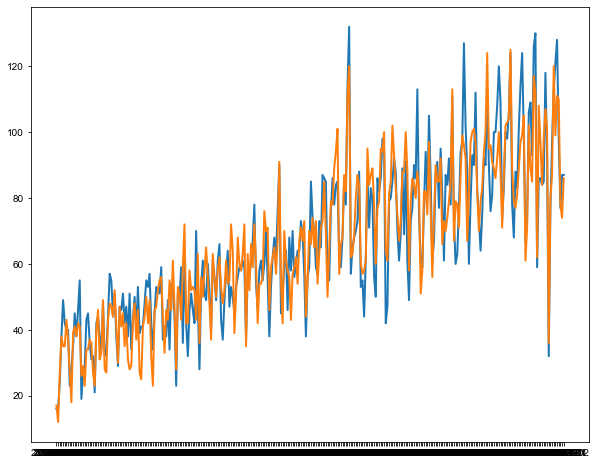

In [98]:
plt.plot(sum_df.loc['12TH', '16TH']['Trip Count'])
plt.plot(sum_df.loc['16TH', '12TH']['Trip Count'])